# Taxi Fare Prediction

### Abstract
In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data-centric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess. 
### Problem Statement
Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.

* __date_time_of_pickup__: The time when the ride started 
* __longitude_of_pickup__: Longitude of the taxi ride pickup point 
* __latitude_of_pickup__: Latitude of the taxi ride pickup point 
* __longitude_of_dropoff__: Longitude of the taxi ride dropoff point 
* __latitude_of_dropoff__: Latitude of the taxi ride dropoff point 
* __no_of_passenger__: count of the passengers during the ride 
* __amount__: (target variable)dollar amount of the cost of the taxi ride

# Assigning working directory

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/Taxi Fare Prediction/')

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth',None)

import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [4]:
df = pd.read_csv('C:/Users/Darshan/Desktop/Taxi Fare Prediction/Dataset/TaxiFare.csv')

In [5]:
df_desc = pd.read_csv('C:/Users/Darshan/Desktop/Taxi Fare Prediction/Dataset/desc.csv')
df_desc.index = df_desc['Column']
df_desc.drop('Column', axis=1, inplace=True)
df_desc = df_desc.T
df_desc.head()

Column,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude__of_dropoff,latitude_of_dropoff,no_of_passenger,amount
Description,A unique identifier or key for each record in the dataset,The time when the ride started,Longitude of the taxi ride pickup point,Latitude of the taxi ride pickup point,Longitude of the taxi ride dropoff point,Latitude of the taxi ride dropoff point,count of the passengers during the ride,(target variable)dollar amount of the cost of the taxi ride


In [6]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Basic commands

In [7]:
df.shape

(50000, 8)

In [8]:
# R = 6373.0


# lat1 = math.radians(52.2296756)

# lon1 = math.radians(21.0122287)
# lat2 = math.radians(52.406374)
# lon2 = math.radians(16.9251681)

# dlon = lon2 - lon1

# dlat = lat2 - lat1

# a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2

# c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
# distance = R * c

# print(distance)

In [9]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [11]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

# Outlier detection and removal

In [12]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [13]:
# Function to find outliers

def outliers(col, data=df):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    ub = Q3 + 1.5*IQR
    lb = Q1 - 1.5*IQR

    lo = sum(data[col]<lb)
    uo = sum(data[col]>ub)

    print('Upper Bound: ', ub)
    print('Lower Bound: ', lb)
    print('No of ouliers below Lower bound: ', lo)
    print('No of ouliers above Upper bound: ', uo, '\n')

    print('Percentage of outliers: ', round((lo+uo)/len(data) * 100,2), '%')

In [14]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
for col in num_cols:
    print(col)
    outliers(col, df)
    print('\n')

amount
Upper Bound:  22.25
Lower Bound:  -3.75
No of ouliers below Lower bound:  1
No of ouliers above Upper bound:  4364 

Percentage of outliers:  8.73 %


longitude_of_pickup
Upper Bound:  -73.92977699999997
Lower Bound:  -74.02943300000001
No of ouliers below Lower bound:  62
No of ouliers above Upper bound:  3367 

Percentage of outliers:  6.86 %


latitude_of_pickup
Upper Bound:  40.816081249999996
Lower Bound:  40.68615925
No of ouliers below Lower bound:  2116
No of ouliers above Upper bound:  247 

Percentage of outliers:  4.73 %


longitude_of_dropoff
Upper Bound:  -73.922231375
Lower Bound:  -74.032504375
No of ouliers below Lower bound:  150
No of ouliers above Upper bound:  3439 

Percentage of outliers:  7.18 %


latitude_of_dropoff
Upper Bound:  40.81886025
Lower Bound:  40.683678249999986
No of ouliers below Lower bound:  2396
No of ouliers above Upper bound:  743 

Percentage of outliers:  6.28 %


no_of_passenger
Upper Bound:  3.5
Lower Bound:  -0.5
No of ouliers belo

#### amount

In [15]:
df['amount'].head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

In [16]:
df['amount'].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

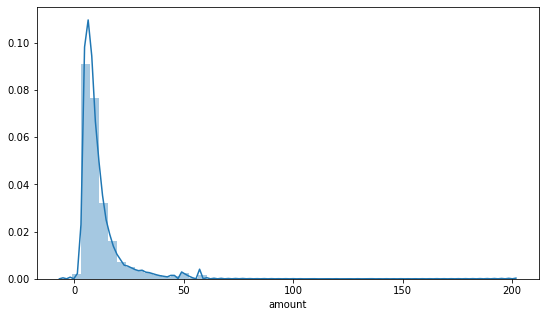

In [17]:
# The min amount of taxi fare is -5, which is not accurate
# Lets create a Histogram

plt.figure(figsize=(9,5))
sns.distplot(df['amount'])

In [18]:
# we can see that most values are between 0 to 50.
# there is a spike near 50 and 55

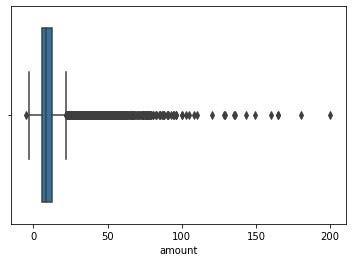

In [19]:
sns.boxplot(df['amount'])

In [20]:
# Lets see number of outliers.

outliers('amount')

Upper Bound:  22.25
Lower Bound:  -3.75
No of ouliers below Lower bound:  1
No of ouliers above Upper bound:  4364 

Percentage of outliers:  8.73 %


In [21]:
# values below 0

df['amount'][df['amount']<0]

2039    -2.9
2486    -2.5
13032   -3.0
28839   -2.5
36722   -2.5
42337   -5.0
Name: amount, dtype: float64

In [22]:
# Removing values below 0

df['amount'][df['amount']<0] = 0

In [23]:
# values below 0

df['amount'][df['amount']<0]

Series([], Name: amount, dtype: float64)

In [24]:
outliers('amount')

Upper Bound:  22.25
Lower Bound:  -3.75
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  4364 

Percentage of outliers:  8.73 %


In [25]:
amount_wo_out = df[df['amount']<22.25]

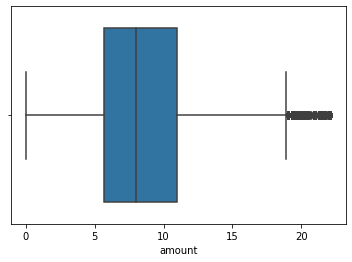

In [26]:
sns.boxplot(amount_wo_out['amount'])

In [27]:
outliers('amount', amount_wo_out)

Upper Bound:  18.95
Lower Bound:  -2.249999999999999
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  1498 

Percentage of outliers:  3.28 %


In [28]:
amount_wo_out2 = amount_wo_out[amount_wo_out['amount']<18.95]

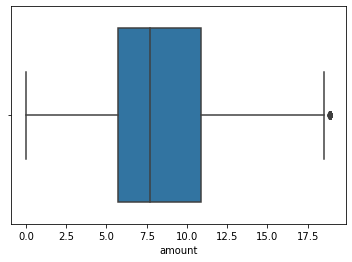

In [29]:
sns.boxplot(amount_wo_out2['amount'])

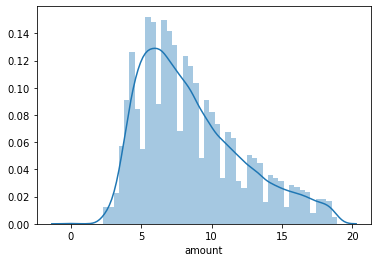

In [30]:
sns.distplot(amount_wo_out2['amount'])

In [31]:
(len(df) - len(amount_wo_out2))/ len(df) * 100

11.724

In [32]:
# 11.7% of the data was removed due to outliers

In [33]:
outliers('amount', amount_wo_out2)

Upper Bound:  18.700000000000003
Lower Bound:  -2.1000000000000005
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  80 

Percentage of outliers:  0.18 %


In [34]:
# For the rest of the outliers, we can equate them to the upperbound

In [35]:
amount_wo_out2['amount'][amount_wo_out2['amount']>18.70] = 18.70

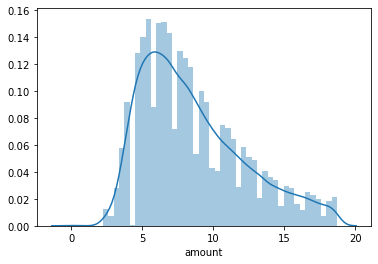

In [36]:
sns.distplot(amount_wo_out2['amount'])

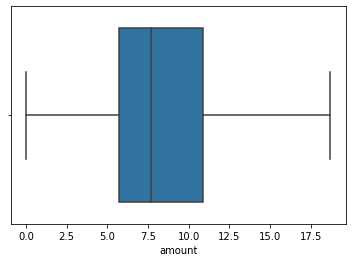

In [37]:
sns.boxplot(amount_wo_out2['amount'])

In [38]:
outliers('amount', amount_wo_out2)

Upper Bound:  18.700000000000003
Lower Bound:  -2.1000000000000005
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  0 

Percentage of outliers:  0.0 %


In [39]:
amount_wo_out2.shape

(44138, 8)

In [40]:
df.shape

(50000, 8)

In [41]:
df1 = amount_wo_out2

In [42]:
df1.shape

(44138, 8)

#### longitude_of_pickup

In [43]:
df1.longitude_of_pickup.head()

0   -73.844311
1   -74.016048
2   -73.982738
3   -73.987130
4   -73.968095
Name: longitude_of_pickup, dtype: float64

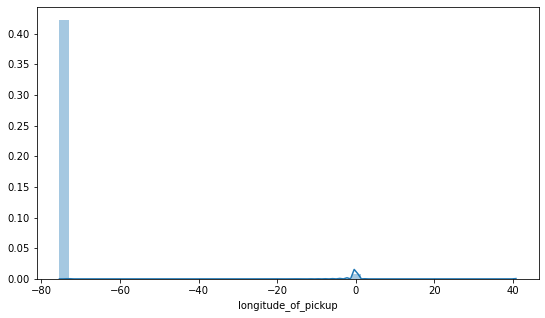

In [44]:
plt.figure(figsize=(9,5))
sns.distplot(df1['longitude_of_pickup'])

In [45]:
df1.longitude_of_pickup.describe()

count    44138.000000
mean       -72.535557
std         10.307575
min        -75.414728
25%        -73.992277
50%        -73.982213
75%        -73.969228
max         40.783472
Name: longitude_of_pickup, dtype: float64

In [46]:
outliers('longitude_of_pickup', data=df1)

Upper Bound:  -73.93465325
Lower Bound:  -74.02685124999999
No of ouliers below Lower bound:  40
No of ouliers above Upper bound:  1623 

Percentage of outliers:  3.77 %


In [47]:
df2 = df1[df1['longitude_of_pickup']<-73.93465325]
df2 = df2[df2['longitude_of_pickup']>-74.02685124999999]

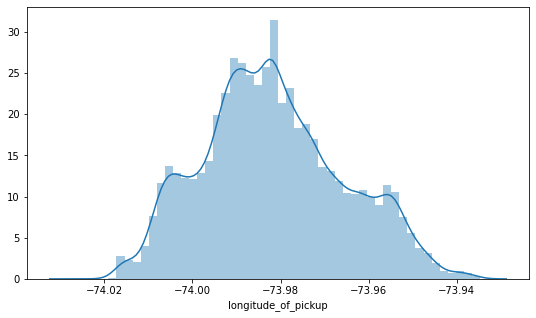

In [48]:
plt.figure(figsize=(9,5))
sns.distplot(df2['longitude_of_pickup'])

In [49]:
outliers('longitude_of_pickup', data=df2)

Upper Bound:  -73.93935400000001
Lower Bound:  -74.02464599999999
No of ouliers below Lower bound:  1
No of ouliers above Upper bound:  124 

Percentage of outliers:  0.29 %


#### latitude_of_pickup

In [50]:
df2.latitude_of_pickup.head()

1    40.711303
2    40.761270
3    40.733143
4    40.768008
5    40.731630
Name: latitude_of_pickup, dtype: float64

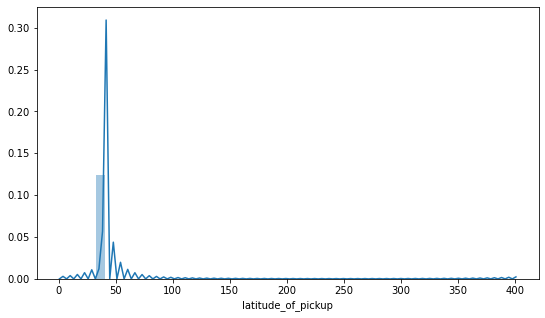

In [51]:
plt.figure(figsize=(9,5))
sns.distplot(df2['latitude_of_pickup'])

In [52]:
df2.latitude_of_pickup.describe()

count    42475.000000
mean        40.759601
std          1.759347
min          0.783332
25%         40.737580
50%         40.753382
75%         40.766809
max        401.083332
Name: latitude_of_pickup, dtype: float64

In [53]:
outliers('latitude_of_pickup', data=df2)

Upper Bound:  40.81065125000001
Lower Bound:  40.69373725
No of ouliers below Lower bound:  462
No of ouliers above Upper bound:  195 

Percentage of outliers:  1.55 %


In [54]:
df3 = df2[df2['latitude_of_pickup']<40.81065125000001]
df3 = df3[df3['latitude_of_pickup']>40.69373725]

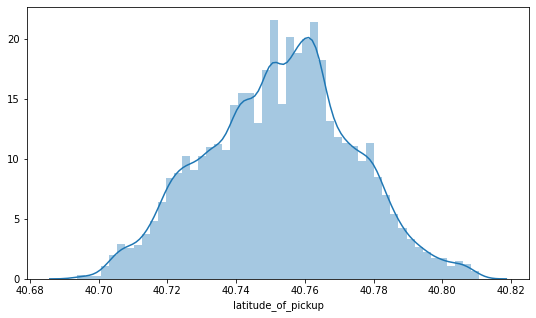

In [55]:
plt.figure(figsize=(9,5))
sns.distplot(df3['latitude_of_pickup'])

In [56]:
outliers('latitude_of_pickup', data=df3)

Upper Bound:  40.80960212500001
Lower Bound:  40.695335125
No of ouliers below Lower bound:  24
No of ouliers above Upper bound:  33 

Percentage of outliers:  0.14 %


#### longitude_of_droppff

In [57]:
df3.longitude_of_dropoff.head()

1   -73.979268
2   -73.991242
3   -73.991567
4   -73.956655
5   -73.972892
Name: longitude_of_dropoff, dtype: float64

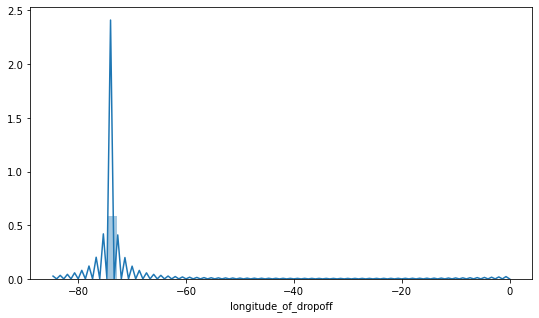

In [58]:
plt.figure(figsize=(9,5))
sns.distplot(df3['longitude_of_dropoff'])

In [59]:
df3.longitude_of_dropoff.describe()

count    41818.000000
mean       -73.922088
std          2.068237
min        -84.654241
25%        -73.991735
50%        -73.981621
75%        -73.969629
max          0.000000
Name: longitude_of_dropoff, dtype: float64

In [60]:
outliers('longitude_of_dropoff', data=df3)

Upper Bound:  -73.936470625
Lower Bound:  -74.02489362499998
No of ouliers below Lower bound:  6
No of ouliers above Upper bound:  594 

Percentage of outliers:  1.43 %


In [61]:
df4 = df3[df3['longitude_of_dropoff']<-73.936470625]
df4 = df4[df4['longitude_of_dropoff']>-74.02489362499998]

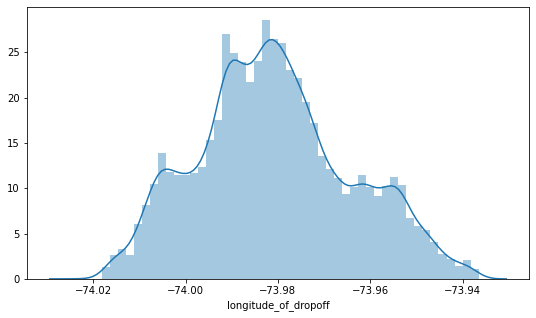

In [62]:
plt.figure(figsize=(9,5))
sns.distplot(df4['longitude_of_dropoff'])

In [63]:
outliers('longitude_of_dropoff', data=df4)

Upper Bound:  -73.93848649999998
Lower Bound:  -74.0239225
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  92 

Percentage of outliers:  0.22 %


#### latitude_of_dropoff

In [64]:
df4.latitude_of_dropoff.head()

1    40.782004
2    40.750562
3    40.758092
4    40.783762
5    40.758233
Name: latitude_of_dropoff, dtype: float64

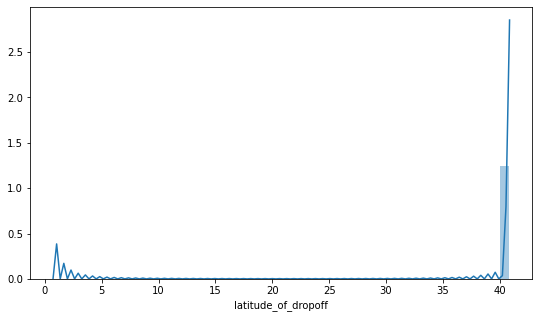

In [65]:
plt.figure(figsize=(9,5))
sns.distplot(df4['latitude_of_dropoff'])

In [66]:
df4.latitude_of_dropoff.describe()

count    41218.000000
mean        40.752114
std          0.198720
min          0.728087
25%         40.738461
50%         40.754469
75%         40.767705
max         40.855758
Name: latitude_of_dropoff, dtype: float64

In [67]:
outliers('latitude_of_dropoff', data=df4)

Upper Bound:  40.81157025000001
Lower Bound:  40.69459624999998
No of ouliers below Lower bound:  490
No of ouliers above Upper bound:  263 

Percentage of outliers:  1.83 %


In [68]:
df5 = df4[df4['latitude_of_dropoff']<40.81157025000001]
df5 = df5[df5['latitude_of_dropoff']>40.69459624999998]

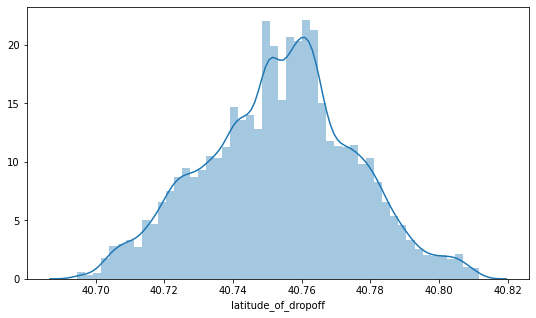

In [69]:
plt.figure(figsize=(9,5))
sns.distplot(df5['latitude_of_dropoff'])

In [70]:
outliers('latitude_of_dropoff', data=df5)

Upper Bound:  40.810250499999995
Lower Bound:  40.6963585
No of ouliers below Lower bound:  44
No of ouliers above Upper bound:  49 

Percentage of outliers:  0.23 %


#### no_of_passenger

In [71]:
df5.no_of_passenger.head()

1    1
2    2
3    1
4    1
5    1
Name: no_of_passenger, dtype: int64

In [72]:
df5.no_of_passenger.value_counts()

1    28272
2     5892
5     2762
3     1789
4      833
6      784
0      133
Name: no_of_passenger, dtype: int64

In [73]:
df5 = df5.replace({'no_of_passenger': {
    0 : '0-2',
    1 : '0-2',
    2 : '0-2',
    3 : '3-6',
    4 : '3-6',
    5 : '3-6',
    6 : '3-6'
}})

In [74]:
df5.no_of_passenger.value_counts()

0-2    34297
3-6     6168
Name: no_of_passenger, dtype: int64

In [75]:
#______________________________________________

In [76]:
num_cols = [col for col in df5.columns if df5[col].dtypes != 'O']

In [77]:
for col in num_cols:
    print(col)
    outliers(col, df5)
    print('\n')

amount
Upper Bound:  17.7
Lower Bound:  -1.4999999999999991
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  459 

Percentage of outliers:  1.13 %


longitude_of_pickup
Upper Bound:  -73.9402525
Lower Bound:  -74.0242325
No of ouliers below Lower bound:  1
No of ouliers above Upper bound:  95 

Percentage of outliers:  0.24 %


latitude_of_pickup
Upper Bound:  40.808907000000005
Lower Bound:  40.69636299999999
No of ouliers below Lower bound:  21
No of ouliers above Upper bound:  40 

Percentage of outliers:  0.15 %


longitude_of_dropoff
Upper Bound:  -73.93930549999999
Lower Bound:  -74.0235495
No of ouliers below Lower bound:  0
No of ouliers above Upper bound:  124 

Percentage of outliers:  0.31 %


latitude_of_dropoff
Upper Bound:  40.810250499999995
Lower Bound:  40.6963585
No of ouliers below Lower bound:  44
No of ouliers above Upper bound:  49 

Percentage of outliers:  0.23 %




In [78]:
len(df)

50000

In [79]:
len(df5)

40465

# train test split

In [80]:
X = df5.drop('amount', axis=1)
y = df5['amount']

In [81]:
X.head()

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,52:16.0,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,0-2
2,35:00.0,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,0-2
3,30:42.0,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,0-2
4,51:00.0,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,0-2
5,50:45.0,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,0-2


In [82]:
y.head()

1    16.9
2     5.7
3     7.7
4     5.3
5    12.1
Name: amount, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
X_train.shape

(30348, 7)

In [85]:
y_train.shape

(30348,)

In [86]:
X_test.shape

(10117, 7)

In [87]:
y_test.shape

(10117,)

# Exploratory Data Analysis (EDA)

In [88]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)

In [89]:
Xy_train.shape

(30348, 8)

In [90]:
Xy_test.shape

(10117, 8)

In [91]:
Xy_train.columns

Index(['unique_id', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'amount'],
      dtype='object')

#### amount

In [92]:
Xy_train.amount.head()

37588     5.0
29043     4.9
3402     10.1
36450    11.0
11102     4.5
Name: amount, dtype: float64

In [93]:
Xy_train.amount.describe()

count    30348.000000
mean         8.366806
std          3.467343
min          0.000000
25%          5.700000
50%          7.700000
75%         10.500000
max         18.700000
Name: amount, dtype: float64

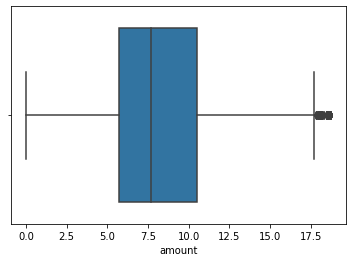

In [94]:
# Boxplot
sns.boxplot(Xy_train.amount)

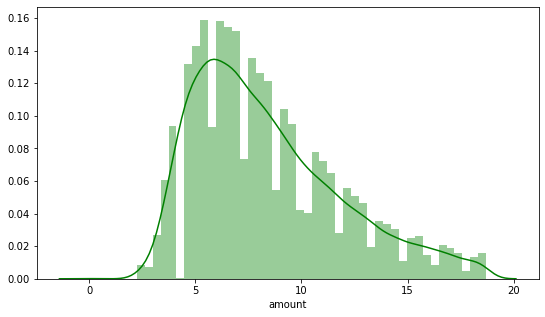

In [95]:
# Histogram
plt.figure(figsize=(9,5))
sns.distplot(Xy_train.amount, color='g')

In [96]:
# The plot shows that some amount is repeated multiple times.
# So lets see the value counts for amount.

In [97]:
Xy_train.amount.value_counts().head(30)

6.5     1738
4.5     1486
8.5     1368
5.7     1035
6.1     1015
5.3     1005
4.9      996
6.9      959
10.5     875
7.3      829
7.7      797
5.5      782
6.0      765
7.0      760
4.1      748
8.1      742
7.5      732
8.0      669
5.0      624
8.9      612
9.0      599
9.3      577
12.5     565
9.5      563
3.7      519
9.7      510
10.0     473
11.0     450
10.1     448
11.5     395
Name: amount, dtype: int64

In [98]:
# The most repeated fare price is 6.5 dollars

In [99]:
Xy_train.amount.nunique()

125

In [100]:
# 136 base fare is repeated in the amount column.

#### unique_id

In [101]:
Xy_train.drop('unique_id', axis=1, inplace=True)

Xy_test.drop('unique_id', axis=1, inplace=True)

#### date_time_of_pickup

In [102]:
Xy_train.date_time_of_pickup.head()

37588    2014-11-24 10:17:00 UTC
29043    2009-04-20 06:05:48 UTC
3402     2009-07-07 08:05:27 UTC
36450    2013-12-08 03:08:17 UTC
11102    2011-05-17 21:18:00 UTC
Name: date_time_of_pickup, dtype: object

In [103]:
# Lets convert this column into datetime format using pd.to_datetime function

Xy_train.date_time_of_pickup = pd.to_datetime(Xy_train.date_time_of_pickup,
                                             format='%Y-%m-%d %H:%M:%S UTC',
                                             errors='coerce')


Xy_test.date_time_of_pickup = pd.to_datetime(Xy_test.date_time_of_pickup,
                                             format='%Y-%m-%d %H:%M:%S UTC',
                                             errors='coerce')

In [104]:
Xy_train.date_time_of_pickup.head()

37588   2014-11-24 10:17:00
29043   2009-04-20 06:05:48
3402    2009-07-07 08:05:27
36450   2013-12-08 03:08:17
11102   2011-05-17 21:18:00
Name: date_time_of_pickup, dtype: datetime64[ns]

In [105]:
# Seperating year, month etc... and creating new columns

Xy_train['pickup_year'] = Xy_train.date_time_of_pickup.dt.year
Xy_train['pickup_month'] = Xy_train.date_time_of_pickup.dt.month
Xy_train['pickup_day'] = Xy_train.date_time_of_pickup.dt.day
Xy_train['pickup_weekday'] = Xy_train.date_time_of_pickup.dt.weekday
Xy_train['pickup_weekdayname'] = Xy_train.date_time_of_pickup.dt.day_name()
Xy_train['pickup_hour'] = Xy_train.date_time_of_pickup.dt.hour
Xy_train['pickup_minute'] = Xy_train.date_time_of_pickup.dt.minute


Xy_test['pickup_year'] = Xy_test.date_time_of_pickup.dt.year
Xy_test['pickup_month'] = Xy_test.date_time_of_pickup.dt.month
Xy_test['pickup_day'] = Xy_test.date_time_of_pickup.dt.day
Xy_test['pickup_weekday'] = Xy_test.date_time_of_pickup.dt.weekday
Xy_test['pickup_weekdayname'] = Xy_test.date_time_of_pickup.dt.day_name()
Xy_test['pickup_hour'] = Xy_test.date_time_of_pickup.dt.hour
Xy_test['pickup_minute'] = Xy_test.date_time_of_pickup.dt.minute

In [106]:
Xy_train.head()

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,pickup_year,pickup_month,pickup_day,pickup_weekday,pickup_weekdayname,pickup_hour,pickup_minute
37588,2014-11-24 10:17:00,-73.990195,40.735175,-73.996097,40.726242,0-2,5.0,2014,11,24,0,Monday,10,17
29043,2009-04-20 06:05:48,-73.985405,40.747816,-73.976558,40.739375,0-2,4.9,2009,4,20,0,Monday,6,5
3402,2009-07-07 08:05:27,-73.962555,40.804948,-73.986943,40.771017,0-2,10.1,2009,7,7,1,Tuesday,8,5
36450,2013-12-08 03:08:17,-74.009540,40.704748,-74.006018,40.735053,0-2,11.0,2013,12,8,6,Sunday,3,8
11102,2011-05-17 21:18:00,-73.999408,40.728158,-73.990132,40.724697,0-2,4.5,2011,5,17,1,Tuesday,21,18


In [107]:
Xy_test.head()

,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,pickup_year,pickup_month,pickup_day,pickup_weekday,pickup_weekdayname,pickup_hour,pickup_minute
46682,2013-04-21 03:55:40,-74.000253,40.728731,-73.992024,40.744299,0-2,7.0,2013,4,21,6,Sunday,3,55
38779,2012-04-16 23:07:24,-73.992471,40.748509,-74.005017,40.729675,0-2,5.3,2012,4,16,0,Monday,23,7
5324,2009-03-27 15:10:59,-73.977796,40.754881,-73.959722,40.771958,0-2,6.9,2009,3,27,4,Friday,15,10
34831,2015-04-24 22:20:10,-74.002388,40.724724,-74.000374,40.719933,3-6,5.0,2015,4,24,4,Friday,22,20
46148,2013-03-02 11:49:23,-73.973707,40.763783,-73.981948,40.769401,0-2,6.0,2013,3,2,5,Saturday,11,49


In [108]:
# Now we can remove date_time_of_pickup column
Xy_train.drop('date_time_of_pickup', axis=1, inplace=True)

Xy_test.drop('date_time_of_pickup', axis=1, inplace=True)

In [109]:
# year_____________________

Xy_train.pickup_year.describe()

count    30348.000000
mean      2011.677672
std          1.853260
min       2009.000000
25%       2010.000000
50%       2012.000000
75%       2013.000000
max       2015.000000
Name: pickup_year, dtype: float64

In [110]:
Xy_train.pickup_year.value_counts()

2012    4886
2009    4852
2011    4849
2010    4801
2013    4648
2014    4359
2015    1953
Name: pickup_year, dtype: int64

In [111]:
# There are almost equal entries for 2009, 2010, 2011, 2012

Text(0.5, 0.98, 'pickup_year vs count and amount')

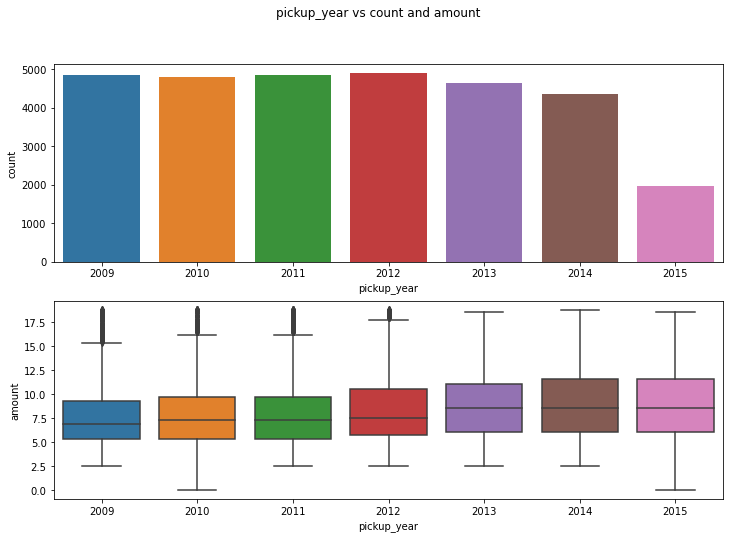

In [112]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
sns.countplot(ax=axes[0], x=Xy_train['pickup_year'])
sns.boxplot(ax=axes[1], x=Xy_train['pickup_year'], y=Xy_train['amount'])
plt.suptitle('pickup_year vs count and amount')

In [113]:
# The amount of taxi rides decreased in 2015, but the amount for these rides are increasing by the year.
# This indicates that the average taxi fare is increasing by the year.

In [114]:
# Lets see if there is any significant impact of year on the amount (fare)

import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = 'There is no significant difference between the mean of amount for each year (No predictability)'
Ha = 'There is a significant difference between the mean of amount for each year (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

anova_model = ols('pickup_year ~ C(amount)', data=Xy_train).fit()
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table)
alpha = 0.05
p = aov_table['PR(>F)'][0]
print('p-value: ', p, '\n')
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant difference between the mean of amount for each year (No predictability)
Ha:  There is a significant difference between the mean of amount for each year (Good predictor)


                 sum_sq       df           F  PR(>F)
C(amount)  56634.413972    124.0  290.027265     0.0
Residual   47594.576801  30223.0         NaN     NaN
p-value:  0.0 

Reject Ho,  There is a significant difference between the mean of amount for each year (Good predictor)


In [115]:
# pickup_month___________________________
Xy_train.pickup_month.head()

37588    11
29043     4
3402      7
36450    12
11102     5
Name: pickup_month, dtype: int64

In [116]:
Xy_train.pickup_month.value_counts()

3     2858
4     2789
1     2769
5     2766
6     2722
2     2605
10    2471
12    2423
7     2273
11    2245
9     2218
8     2209
Name: pickup_month, dtype: int64

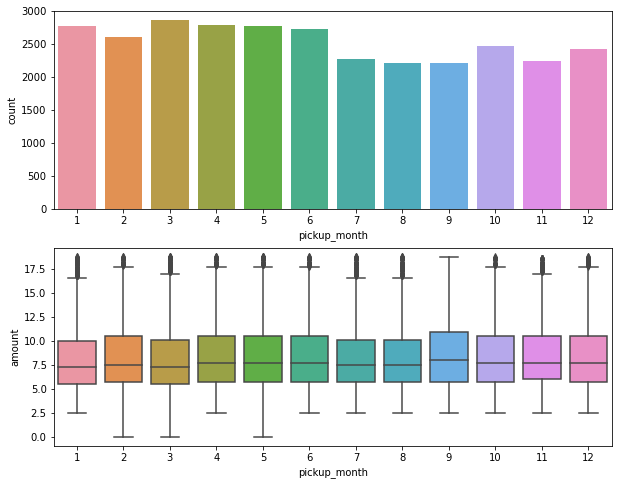

In [117]:
fig, axes = plt.subplots(2,1,figsize=(10,8))

sns.countplot(ax=axes[0], x=Xy_train.pickup_month)

sns.boxplot(ax=axes[1], x=Xy_train.pickup_month, y=Xy_train.amount)

In [118]:
# The average taxi rides decreases around August, but the amount collected is almost constant for all the months.

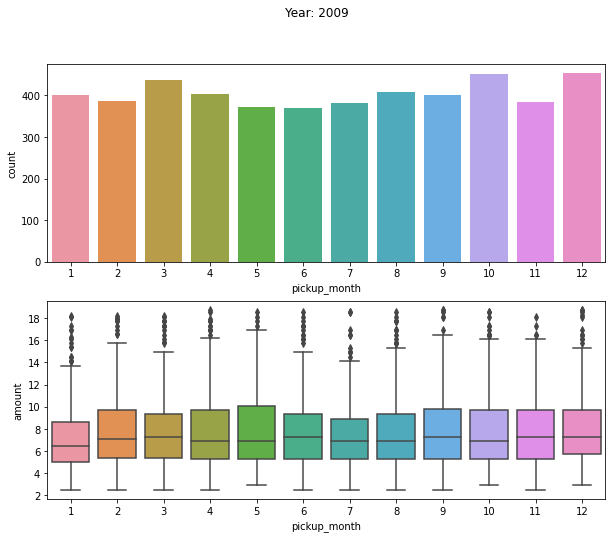

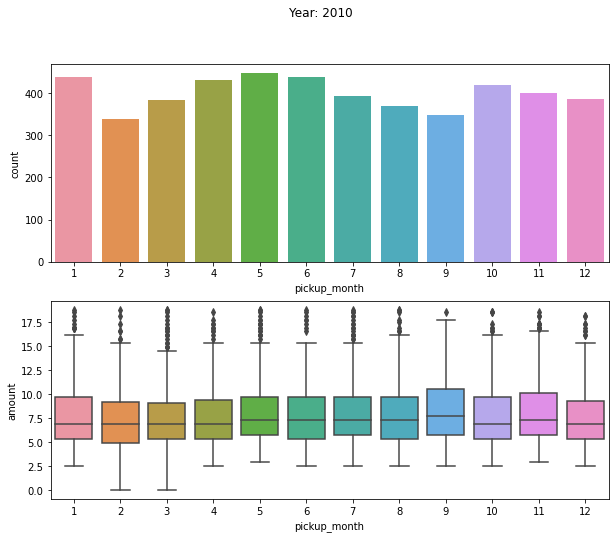

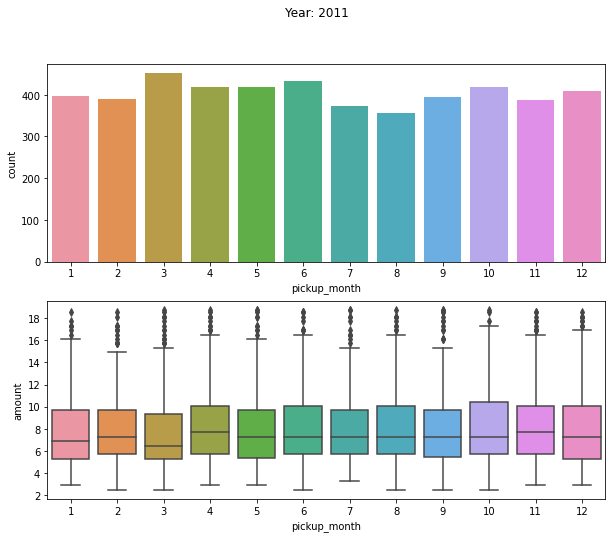

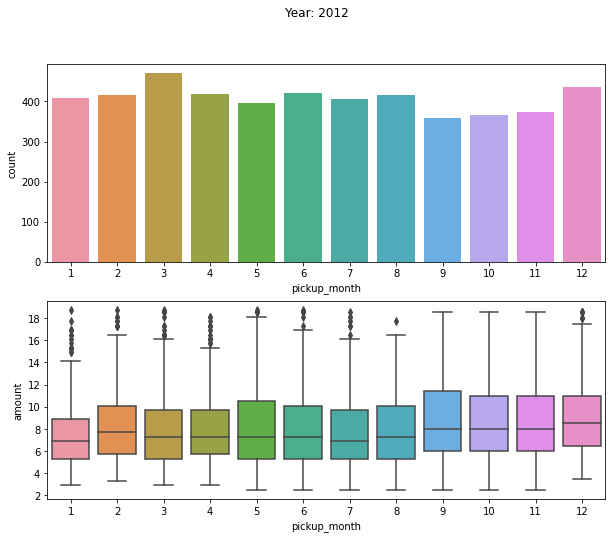

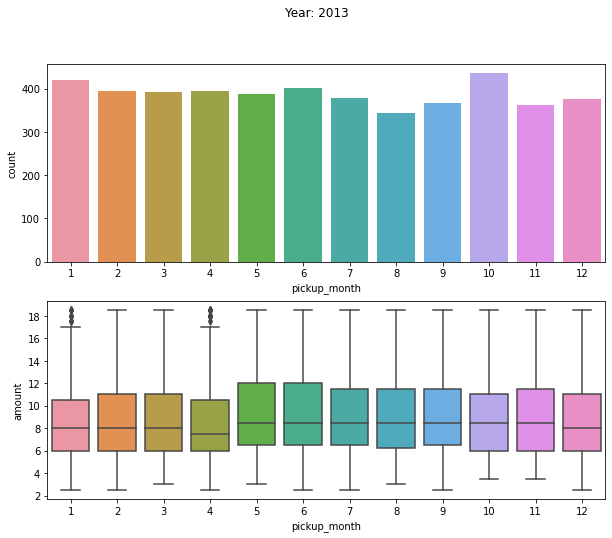

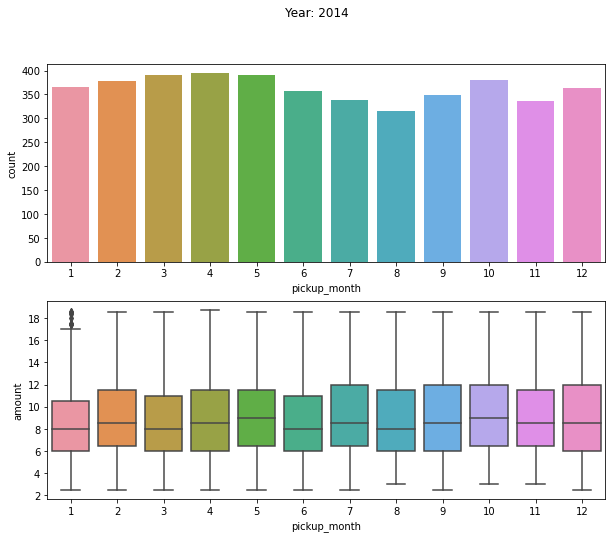

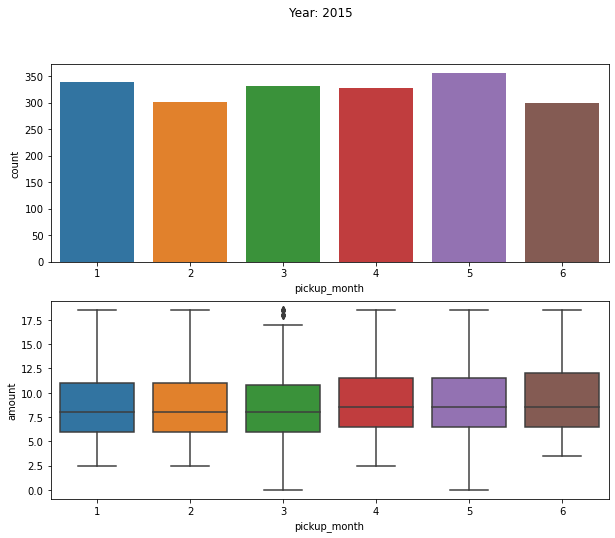

In [119]:
for yr in sorted(Xy_train['pickup_year'].unique()):
    data = Xy_train[Xy_train['pickup_year']==yr]
    fig, axes = plt.subplots(2,1,figsize=(10,8))
    sns.countplot(ax=axes[0], x=data.pickup_month)
    sns.boxplot(ax=axes[1], x=data.pickup_month, y=data.amount)
    plt.suptitle(f'Year: {yr}')
    plt.show()

In [120]:
# For each month, the average count of taxi rides is around 400 to 500, and the average amount collected for rides is
# around 8 to 10.

# But for the year 2015, there is only 6 months of data.

In [121]:
# Lets see if there is any significant impact of month on the amount (fare)

import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = 'There is no significant difference between the mean of amount for each month (No predictability)'
Ha = 'There is a significant difference between the mean of amount for each month (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

anova_model = ols('pickup_month ~ C(amount)', data=Xy_train).fit()
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table, '\n')
alpha = 0.05
p = aov_table['PR(>F)'][0]
print('p-value: ', p, '\n')
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant difference between the mean of amount for each month (No predictability)
Ha:  There is a significant difference between the mean of amount for each month (Good predictor)


                  sum_sq       df         F        PR(>F)
C(amount)    5225.845072    124.0  3.565096  6.548081e-37
Residual   357273.780966  30223.0       NaN           NaN 

p-value:  6.5480812456975985e-37 

Reject Ho,  There is a significant difference between the mean of amount for each month (Good predictor)


In [122]:
# week_________________________________
Xy_train.pickup_weekdayname.head()

37588     Monday
29043     Monday
3402     Tuesday
36450     Sunday
11102    Tuesday
Name: pickup_weekdayname, dtype: object

In [123]:
Xy_train.pickup_weekdayname.value_counts()

Friday       4722
Saturday     4639
Thursday     4456
Wednesday    4401
Tuesday      4294
Monday       4024
Sunday       3812
Name: pickup_weekdayname, dtype: int64

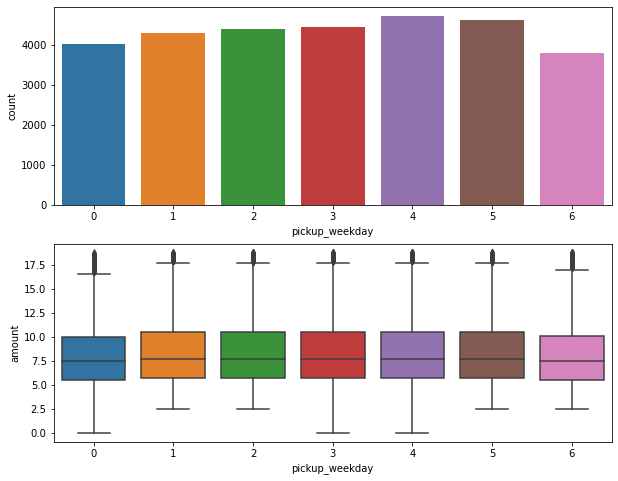

In [124]:
fig, axes = plt.subplots(2,1,figsize=(10,8))

sns.countplot(ax=axes[0], x=Xy_train.pickup_weekday)

sns.boxplot(ax=axes[1], x=Xy_train.pickup_weekday, y=Xy_train.amount)

In [125]:
# Here 0 is monday and 6 is sunday

In [126]:
# Lets see if there is any significant impact of weekday on the amount (fare)

import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = 'There is no significant difference between the mean of amount for each weekday (No predictability)'
Ha = 'There is a significant difference between the mean of amount for each weekday (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

anova_model = ols('pickup_weekday ~ C(amount)', data=Xy_train).fit()
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table, '\n')
alpha = 0.05
p = aov_table['PR(>F)'][0]
print('p-value: ', p, '\n')
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant difference between the mean of amount for each weekday (No predictability)
Ha:  There is a significant difference between the mean of amount for each weekday (Good predictor)


                  sum_sq       df        F    PR(>F)
C(amount)     535.071065    124.0  1.13563  0.144003
Residual   114839.295186  30223.0      NaN       NaN 

p-value:  0.14400341469397965 

Fail to reject Ho,  There is no significant difference between the mean of amount for each weekday (No predictability)


In [127]:
# day_________________________
Xy_train.pickup_day.head()

37588    24
29043    20
3402      7
36450     8
11102    17
Name: pickup_day, dtype: int64

In [128]:
Xy_train.pickup_day.value_counts()

12    1055
8     1053
10    1049
14    1039
16    1035
17    1034
21    1034
7     1033
15    1033
22    1031
9     1030
18    1027
23    1026
13    1022
28    1009
2      998
6      997
19     994
25     982
20     980
11     974
5      974
3      965
24     948
27     932
4      925
1      906
26     904
30     902
29     878
31     579
Name: pickup_day, dtype: int64

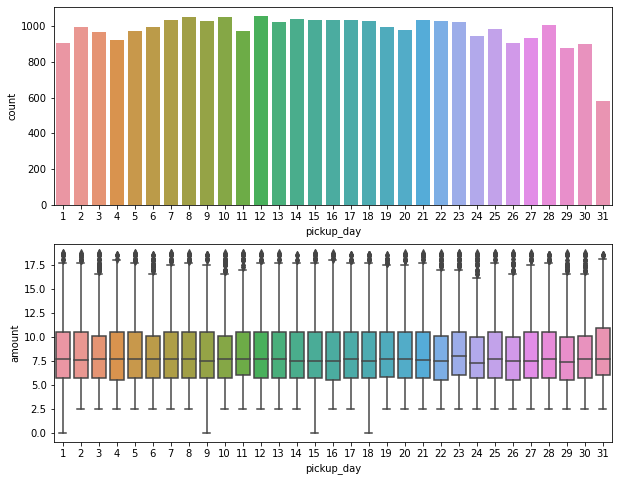

In [129]:
fig, axes = plt.subplots(2,1,figsize=(10,8))

sns.countplot(ax=axes[0], x=Xy_train.pickup_day)

sns.boxplot(ax=axes[1], x=Xy_train.pickup_day, y=Xy_train.amount)

In [130]:
# Lets see if there is any significant impact of day on the amount (fare)

import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = 'There is no significant difference between the mean of amount for each day (No predictability)'
Ha = 'There is a significant difference between the mean of amount for each day (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

anova_model = ols('pickup_day ~ C(amount)', data=Xy_train).fit()
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table, '\n')
alpha = 0.05
p = aov_table['PR(>F)'][0]
print('p-value: ', p, '\n')
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant difference between the mean of amount for each day (No predictability)
Ha:  There is a significant difference between the mean of amount for each day (Good predictor)


                 sum_sq       df         F    PR(>F)
C(amount)  1.017341e+04    124.0  1.086438  0.241249
Residual   2.282325e+06  30223.0       NaN       NaN 

p-value:  0.24124931151675097 

Fail to reject Ho,  There is no significant difference between the mean of amount for each day (No predictability)


In [131]:
# pickup_day is not a good predictor

In [132]:
# hour_________________________________
Xy_train.pickup_hour.head()

37588    10
29043     6
3402      8
36450     3
11102    21
Name: pickup_hour, dtype: int64

In [133]:
Xy_train.pickup_hour.value_counts()

19    1986
18    1963
20    1726
21    1699
22    1659
13    1543
17    1530
11    1524
9     1519
12    1518
14    1506
15    1464
23    1443
10    1439
8     1425
16    1251
7     1202
0     1047
1      794
2      592
6      566
3      453
4      269
5      230
Name: pickup_hour, dtype: int64

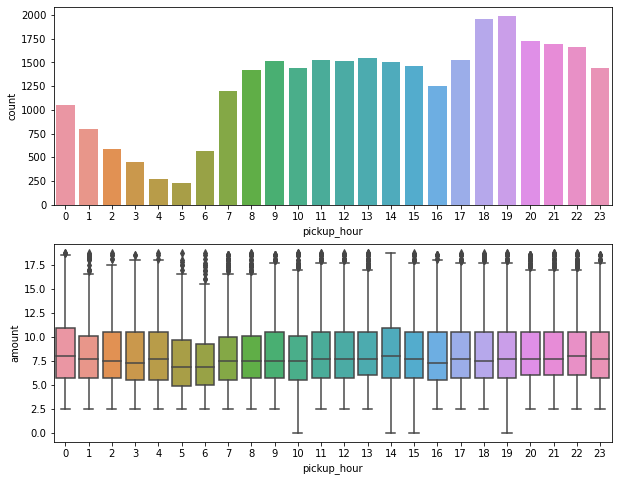

In [134]:
fig, axes = plt.subplots(2,1,figsize=(10,8))

sns.countplot(ax=axes[0], x=Xy_train.pickup_hour)

sns.boxplot(ax=axes[1], x=Xy_train.pickup_hour, y=Xy_train.amount)

In [135]:
# There is a very low pickup rate from 12am to 6am.

In [136]:
# Lets see if there is any significant impact of hour on the amount (fare)

import statsmodels.api as sm
from statsmodels.formula.api import ols

Ho = 'There is no significant difference between the mean of amount for each hour (No predictability)'
Ha = 'There is a significant difference between the mean of amount for each hour (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

anova_model = ols('pickup_hour ~ C(amount)', data=Xy_train).fit()
aov_table = sm.stats.anova_lm(anova_model, typ=2)
print(aov_table, '\n')
alpha = 0.05
p = aov_table['PR(>F)'][0]
print('p-value: ', p, '\n')
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant difference between the mean of amount for each hour (No predictability)
Ha:  There is a significant difference between the mean of amount for each hour (Good predictor)


                 sum_sq       df         F        PR(>F)
C(amount)  8.824086e+03    124.0  1.776449  2.487626e-07
Residual   1.210690e+06  30223.0       NaN           NaN 

p-value:  2.487625801964908e-07 

Reject Ho,  There is a significant difference between the mean of amount for each hour (Good predictor)


In [137]:
#____________________________________________
Xy_train.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,pickup_year,pickup_month,pickup_day,pickup_weekday,pickup_weekdayname,pickup_hour,pickup_minute
37588,-73.990195,40.735175,-73.996097,40.726242,0-2,5.0,2014,11,24,0,Monday,10,17
29043,-73.985405,40.747816,-73.976558,40.739375,0-2,4.9,2009,4,20,0,Monday,6,5
3402,-73.962555,40.804948,-73.986943,40.771017,0-2,10.1,2009,7,7,1,Tuesday,8,5
36450,-74.009540,40.704748,-74.006018,40.735053,0-2,11.0,2013,12,8,6,Sunday,3,8
11102,-73.999408,40.728158,-73.990132,40.724697,0-2,4.5,2011,5,17,1,Tuesday,21,18


In [138]:
# We can drop pickup_day(because it has no predictability), pickup_weekdayname(because it is same as pickup_weekday) and
# pickup_minute.

Xy_train.drop(['pickup_day', 'pickup_weekdayname', 'pickup_minute'], axis=1, inplace=True)

Xy_test.drop(['pickup_day', 'pickup_weekdayname', 'pickup_minute'], axis=1, inplace=True)

In [139]:
Xy_train.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount,pickup_year,pickup_month,pickup_weekday,pickup_hour
37588,-73.990195,40.735175,-73.996097,40.726242,0-2,5.0,2014,11,0,10
29043,-73.985405,40.747816,-73.976558,40.739375,0-2,4.9,2009,4,0,6
3402,-73.962555,40.804948,-73.986943,40.771017,0-2,10.1,2009,7,1,8
36450,-74.009540,40.704748,-74.006018,40.735053,0-2,11.0,2013,12,6,3
11102,-73.999408,40.728158,-73.990132,40.724697,0-2,4.5,2011,5,1,21


#### longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff and latitude_of_dropoff

In [140]:
# We can convert these longitudes and latitudes to distance

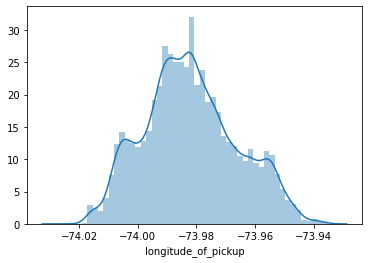

In [141]:
sns.distplot(Xy_train.longitude_of_pickup)

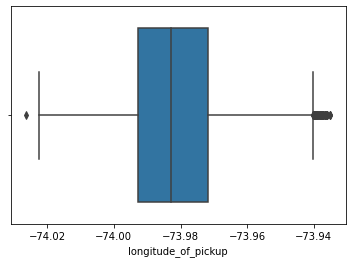

In [142]:
sns.boxplot(Xy_train.longitude_of_pickup)

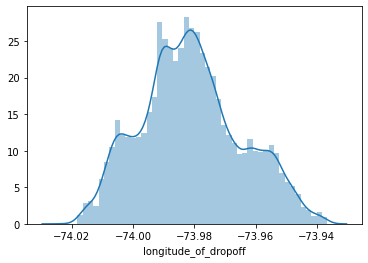

In [143]:
sns.distplot(Xy_train.longitude_of_dropoff)

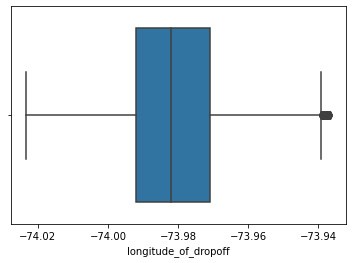

In [144]:
sns.boxplot(Xy_train.longitude_of_dropoff)

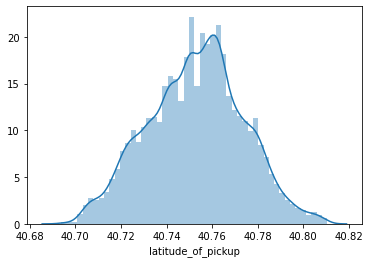

In [145]:
sns.distplot(Xy_train.latitude_of_pickup)

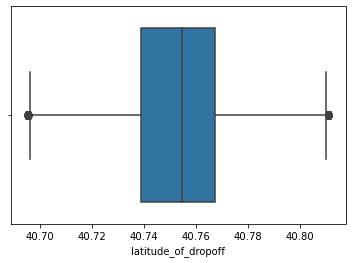

In [146]:
sns.boxplot(Xy_train.latitude_of_dropoff)

In [147]:
#Distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))


In [148]:
Xy_train['distance_travelled'] = distance(Xy_train.latitude_of_pickup, Xy_train.longitude_of_pickup,
                                    Xy_train.latitude_of_dropoff, Xy_train.longitude_of_dropoff)

Xy_test['distance_travelled'] = distance(Xy_test.latitude_of_pickup, Xy_test.longitude_of_pickup,
                                    Xy_test.latitude_of_dropoff, Xy_test.longitude_of_dropoff)

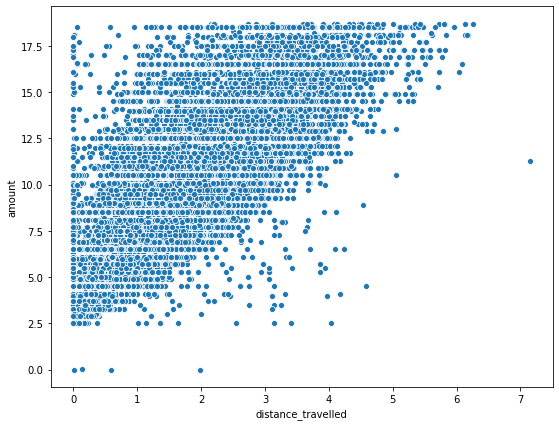

In [149]:
plt.figure(figsize=(9,7))
sns.scatterplot(Xy_train['distance_travelled'], Xy_train['amount'])

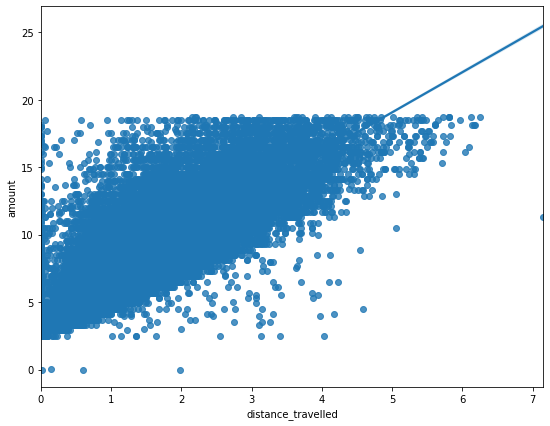

In [150]:
plt.figure(figsize=(9,7))
sns.regplot(Xy_train['distance_travelled'], Xy_train['amount'])

In [151]:
from scipy.stats import pearsonr
corr, _ = pearsonr(Xy_train['distance_travelled'], Xy_train['amount'])
print(corr)

0.7963444449738967


In [152]:
# There is a 79.6% correlation betweeen distance_travelled and amount, 
# so distance travelled can be a good predictor for amount.

In [153]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [154]:
# Lets remove the latitude and longitude columns.

Xy_train1 = Xy_train.drop(['longitude_of_pickup',
                           'latitude_of_pickup',
                           'longitude_of_dropoff',
                           'latitude_of_dropoff'], axis=1)

Xy_test1 = Xy_test.drop(['longitude_of_pickup',
                           'latitude_of_pickup',
                           'longitude_of_dropoff',
                           'latitude_of_dropoff'], axis=1)

In [155]:
Xy_train1.head()

,no_of_passenger,amount,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_travelled
37588,0-2,5.0,2014,11,0,10,0.690246
29043,0-2,4.9,2009,4,0,6,0.744730
3402,0-2,10.1,2009,7,1,8,2.669066
36450,0-2,11.0,2013,12,6,3,2.101980
11102,0-2,4.5,2011,5,1,21,0.541379


#### no_of_passenger

In [156]:
Xy_train1.no_of_passenger.head()

37588    0-2
29043    0-2
3402     0-2
36450    0-2
11102    0-2
Name: no_of_passenger, dtype: object

In [157]:
Xy_train1.no_of_passenger.value_counts()

0-2    25686
3-6     4662
Name: no_of_passenger, dtype: int64

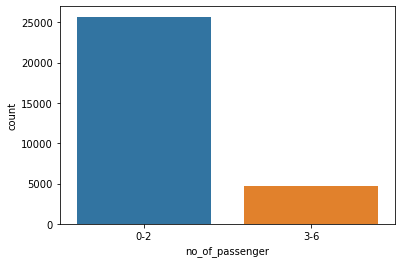

In [158]:
sns.countplot(Xy_train1.no_of_passenger)

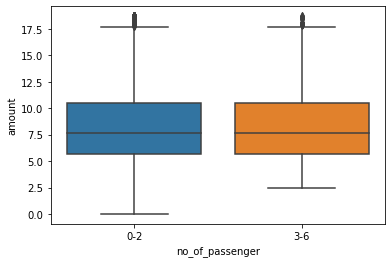

In [159]:
sns.boxplot(Xy_train1.no_of_passenger, Xy_train1.amount)

In [160]:
# Lets see if there is any significant impact of no_of_passenger on the amount (fare)

from scipy.stats import ttest_ind

Ho = 'There is no significant difference between the mean of amount for no_of_passenger (No predictability)'
Ha = 'There is a significant difference between the mean of amount for no_of_passenger (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

ind1 = Xy_train1[Xy_train1['no_of_passenger']=='0-2']
ind2 = Xy_train1[Xy_train1['no_of_passenger']=='3-6']
stat, p = ttest_ind(ind1['amount'], ind2['amount'])
alpha = 0.05

print('p-value: ', p, '\n')
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant difference between the mean of amount for no_of_passenger (No predictability)
Ha:  There is a significant difference between the mean of amount for no_of_passenger (Good predictor)


p-value:  0.09722319855163435 

Fail to reject Ho,  There is no significant difference between the mean of amount for no_of_passenger (No predictability)


In [161]:
# no_of_passenger has no effect on amount, we can remove that column

Xy_train2 = Xy_train1.drop('no_of_passenger', axis=1)

Xy_test2 = Xy_test1.drop('no_of_passenger', axis=1)

# Preprocessing

In [162]:
Xy_train2.head()

,amount,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_travelled
37588,5.0,2014,11,0,10,0.690246
29043,4.9,2009,4,0,6,0.744730
3402,10.1,2009,7,1,8,2.669066
36450,11.0,2013,12,6,3,2.101980
11102,4.5,2011,5,1,21,0.541379


In [163]:
Xy_test2.head()

,amount,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_travelled
46682,7.0,2013,4,6,3,1.158712
38779,5.3,2012,4,0,23,1.457661
5324,6.9,2009,3,4,15,1.512221
34831,5.0,2015,4,4,22,0.347439
46148,6.0,2013,3,5,11,0.580214


In [164]:
Xy_train2.shape

(30348, 6)

In [165]:
Xy_test2.shape

(10117, 6)

In [166]:
X_train1 = Xy_train2.drop('amount', axis=1)
y_train1 = Xy_train2[['amount']]

X_test1 = Xy_test2.drop('amount', axis=1)
y_test1 = Xy_test2[['amount']]

In [167]:
X_train1.shape

(30348, 5)

In [168]:
y_train1.shape

(30348, 1)

In [169]:
X_test1.shape

(10117, 5)

In [170]:
y_test1.shape

(10117, 1)

# Linear Regression

In [171]:
X_train1.head()

,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_travelled
37588,2014,11,0,10,0.690246
29043,2009,4,0,6,0.744730
3402,2009,7,1,8,2.669066
36450,2013,12,6,3,2.101980
11102,2011,5,1,21,0.541379


In [172]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30348 entries, 37588 to 19511
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pickup_year         30348 non-null  int64  
 1   pickup_month        30348 non-null  int64  
 2   pickup_weekday      30348 non-null  int64  
 3   pickup_hour         30348 non-null  int64  
 4   distance_travelled  30348 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 2.6 MB


In [173]:
y_train1.head()

,amount
37588,5.0
29043,4.9
3402,10.1
36450,11.0
11102,4.5


In [174]:
# Lets scale the values for linear regression model

from sklearn.preprocessing import StandardScaler

ssx = StandardScaler()
X_train1_ss = ssx.fit_transform(X_train1)
X_test1_ss = ssx.transform(X_test1)


ssy = StandardScaler()
y_train1_ss = ssy.fit_transform(y_train1)
y_test1_ss = ssy.transform(y_test1)

In [175]:
X_train1_ss

array([[ 1.25312463,  1.37225722, -1.54495831, -0.57395456, -0.76833089],
       [-1.4448681 , -0.65313574, -1.54495831, -1.20495785, -0.70963366],
       [-1.4448681 ,  0.21488981, -1.03208467, -0.88945621,  1.36353737],
       ...,
       [ 1.25312463,  0.21488981, -1.03208467,  0.68805204,  0.46739979],
       [ 0.71352609, -1.23181945,  1.01940986,  0.05704874,  0.51468065],
       [-0.90526955,  1.37225722,  0.50653623, -2.1514628 ,  0.9535181 ]])

In [176]:
y_train1_ss

array([[-0.97102064],
       [-0.99986165],
       [ 0.49987067],
       ...,
       [ 0.61523469],
       [ 0.32682463],
       [ 0.61523469]])

In [177]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [178]:
lin_model.fit(X_train1_ss, y_train1_ss)

LinearRegression()

In [179]:
y_pred_lin = lin_model.predict(X_test1_ss)

In [180]:
y_pred_lin

array([[-0.16909941],
       [ 0.09066102],
       [-0.21776043],
       ...,
       [ 1.31059488],
       [-0.47006421],
       [-0.53896925]])

In [181]:
y_pred_lin_inv = ssy.inverse_transform(y_pred_lin)

In [182]:
y_pred_lin_inv

array([[ 7.78048979],
       [ 8.68115334],
       [ 7.61176817],
       ...,
       [12.91101224],
       [ 6.73695895],
       [ 6.49804548]])

In [183]:
y_test1.values

array([[ 7. ],
       [ 5.3],
       [ 6.9],
       ...,
       [15. ],
       [ 6.5],
       [ 7.5]])

## Model Evaluation

In [184]:
error_lin = y_test1.values - y_pred_lin_inv
error_lin

array([[-0.78048979],
       [-3.38115334],
       [-0.71176817],
       ...,
       [ 2.08898776],
       [-0.23695895],
       [ 1.00195452]])

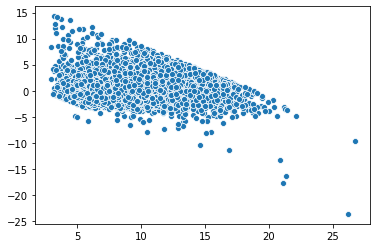

In [185]:
sns.scatterplot(y_pred_lin_inv.flatten(), error_lin.flatten())

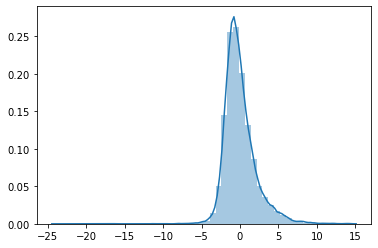

In [186]:
sns.distplot(error_lin)

#### MAE, MSE AND RMSE

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_lin = mean_absolute_error(y_test1, y_pred_lin_inv)
mse_lin = mean_squared_error(y_test1, y_pred_lin_inv)
rmse_lin = np.sqrt(mse_lin)

print('MAE: ', mae_lin)
print('MSE: ', mse_lin)
print('RMSE: ', rmse_lin)

MAE:  1.4944727108706504
MSE:  4.319061753221846
RMSE:  2.078235249730368


#### r2 score

In [188]:
from sklearn.metrics import r2_score


r2_lin = r2_score(y_test1, y_pred_lin_inv)

print('r^2 score: ', r2_lin)
print('\n')
print(f'{round(r2_lin,4)*100}% of variance in amount is explained by Independent variables collectively')

r^2 score:  0.6472630403026909


64.73% of variance in amount is explained by Independent variables collectively


# Decision Tree

In [189]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [190]:
dtr.fit(X_train1, y_train1)

DecisionTreeRegressor()

In [191]:
y_pred_dtr = dtr.predict(X_test1)

In [192]:
y_pred_dtr = y_pred_dtr.reshape(-1,1)

In [193]:
y_pred_dtr

array([[ 8.5],
       [ 6.5],
       [ 6.5],
       ...,
       [16. ],
       [ 6.9],
       [ 6.5]])

In [194]:
y_test1.values

array([[ 7. ],
       [ 5.3],
       [ 6.9],
       ...,
       [15. ],
       [ 6.5],
       [ 7.5]])

In [195]:
error_dtr = y_test1.values - y_pred_dtr
error_dtr

array([[-1.5],
       [-1.2],
       [ 0.4],
       ...,
       [-1. ],
       [-0.4],
       [ 1. ]])

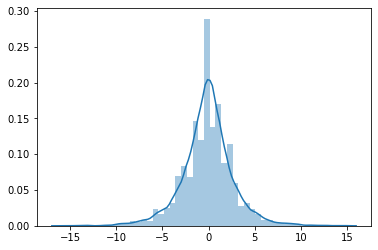

In [196]:
sns.distplot(error_dtr)

#### MAE, MSE AND RMSE

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_dtr = mean_absolute_error(y_test1, y_pred_dtr)
mse_dtr = mean_squared_error(y_test1, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

print('MAE: ', mae_dtr)
print('MSE: ', mse_dtr)
print('RMSE: ', rmse_dtr)

MAE:  1.9920381536028469
MSE:  7.790963042403875
RMSE:  2.791229664933338


#### r2 score

In [198]:
from sklearn.metrics import r2_score


r2_dtr = r2_score(y_test1, y_pred_dtr)

print('r^2 score: ', r2_dtr)
print('\n')
print(f'{round(r2_dtr,4)*100}% of variance in amount is explained by Independent variables collectively')

r^2 score:  0.363713516102977


36.370000000000005% of variance in amount is explained by Independent variables collectively


# Decision tree 2

In [199]:
from sklearn.tree import DecisionTreeRegressor


#_______________________________________________________________

# from sklearn.model_selection import GridSearchCV

In [200]:
# param_grid = {
#     'criterion' : ["mse", "friedman_mse", "mae"],
#     'splitter' : ["best", "random"],
#     'max_depth' : range(1,40),
#     'min_samples_split' : range(1,40),
#     'min_samples_leaf' : range(1,20),
#     'max_features' : ["auto", "sqrt", "log2"]
# }

In [201]:
# dtr2 = DecisionTreeRegressor()
# dtr2_gs = GridSearchCV(dtr2, param_grid=param_grid, cv=5)

In [202]:
# dtr2_gs.fit(X_train1, y_train1)



#__________________________________________________________________

In [203]:
# Since GridSearchCV is taking too much time, we can compare with the 1st decision tree model and select parameters.

# Parameters used for decision tree model 1

print('criterion: ', dtr.criterion)
print('splitter: ', dtr.splitter)
print('depth: ', dtr.get_depth())
print('min_samples_split: ', dtr.min_samples_split)
print('min_samples_leaf: ', dtr.min_samples_leaf)
print('max_features: ', dtr.max_features_)

criterion:  mse
splitter:  best
depth:  36
min_samples_split:  2
min_samples_leaf:  1
max_features:  5


In [204]:
dtr_2 = DecisionTreeRegressor(criterion='mse',
                              splitter='best',
                              max_depth=26,
                              min_samples_split=20,
                              min_samples_leaf=10,
                              max_features='sqrt')

In [205]:
dtr_2.fit(X_train1, y_train1)

DecisionTreeRegressor(max_depth=26, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20)

In [206]:
y_pred_dtr2_gs = dtr_2.predict(X_test1)

In [207]:
y_pred_dtr2_gs = y_pred_dtr2_gs.reshape(-1,1)

In [208]:
y_pred_dtr2_gs

array([[ 8.15      ],
       [ 7.02173913],
       [ 8.11052632],
       ...,
       [15.1       ],
       [ 7.32666667],
       [ 6.1875    ]])

In [209]:
y_test1.values

array([[ 7. ],
       [ 5.3],
       [ 6.9],
       ...,
       [15. ],
       [ 6.5],
       [ 7.5]])

In [210]:
error_dtr2_gs = y_test1.values - y_pred_dtr2_gs
error_dtr2_gs

array([[-1.15      ],
       [-1.72173913],
       [-1.21052632],
       ...,
       [-0.1       ],
       [-0.82666667],
       [ 1.3125    ]])

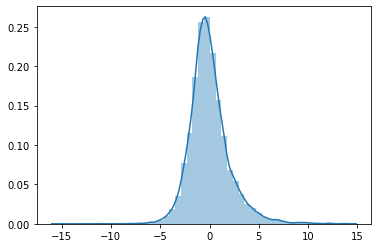

In [211]:
sns.distplot(error_dtr2_gs)

#### MAE, MSE AND RMSE

In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_dtr2_gs = mean_absolute_error(y_test1, y_pred_dtr2_gs)
mse_dtr2_gs = mean_squared_error(y_test1, y_pred_dtr2_gs)
rmse_dtr2_gs = np.sqrt(mse_dtr2_gs)

print('MAE: ', mae_dtr2_gs)
print('MSE: ', mse_dtr2_gs)
print('RMSE: ', rmse_dtr2_gs)

MAE:  1.485100175330855
MSE:  4.224075456863292
RMSE:  2.0552555697195647


#### r2 score

In [213]:
from sklearn.metrics import r2_score


r2_dtr2_gs = r2_score(y_test1, y_pred_dtr2_gs)

print('r^2 score: ', r2_dtr2_gs)
print('\n')
print(f'{round(r2_dtr2_gs,4)*100}% of variance in amount is explained by Independent variables collectively')

r^2 score:  0.6550205532313798


65.5% of variance in amount is explained by Independent variables collectively


# Random Forest

In [214]:
from sklearn.ensemble import RandomForestRegressor


#_______________________________________________________________

# from sklearn.model_selection import GridSearchCV

In [215]:
# #Build Random Forest Model with hyperparameters
# # Number of trees in random forest

# #linspace to get a sequence of number with evenly space
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num=3)] 

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt'] #We can also specify numbers, ,log2 

# # Maximum number of levels in tree
# max_depth = [2,5]

# # Minimum number of samples required to split a node
# min_samples_split = [10,20]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [5,10]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# #CV - Cross Validation

# #n_jobs = no of jobs to run in parallel - it helps to reduce the load on processor 

# # Create the parameter grid as dictionary
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(param_grid)


In [216]:
# #Building the model

# rfr =RandomForestRegressor()
# rfr_Grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 4)

In [217]:
# rfr_Grid.fit(X_train1, y_train1)



#__________________________________________________________________

In [218]:
# Lets use these parameters, and create a new random forest model.

# {'bootstrap': False,
#  'max_depth': 5,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 5,
#  'min_samples_split': 20,
#  'n_estimators': 100}

In [219]:
rfr_1 = RandomForestRegressor(n_estimators=100,
                             max_depth=5,
                             max_features='sqrt',
                             min_samples_leaf=5,
                             min_samples_split=20,
                             bootstrap=False)

In [220]:
rfr_1.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=False, max_depth=5, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=20)

In [221]:
y_pred_rfr_1 = rfr_1.predict(X_test1)

In [222]:
y_pred_rfr_1 = y_pred_rfr_1.reshape(-1,1)

In [223]:
y_pred_rfr_1

array([[ 7.7038635 ],
       [ 7.53872292],
       [ 7.54698952],
       ...,
       [13.39762559],
       [ 7.11778567],
       [ 6.56448913]])

In [224]:
y_test1.values

array([[ 7. ],
       [ 5.3],
       [ 6.9],
       ...,
       [15. ],
       [ 6.5],
       [ 7.5]])

In [225]:
error_rfr_1 = y_test1.values - y_pred_rfr_1
error_rfr_1

array([[-0.7038635 ],
       [-2.23872292],
       [-0.64698952],
       ...,
       [ 1.60237441],
       [-0.61778567],
       [ 0.93551087]])

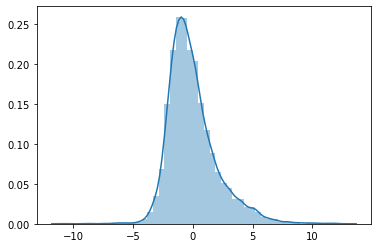

In [226]:
sns.distplot(error_rfr_1)

#### MAE, MSE AND RMSE

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rfr_1 = mean_absolute_error(y_test1, y_pred_rfr_1)
mse_rfr_1 = mean_squared_error(y_test1, y_pred_rfr_1)
rmse_rfr_1 = np.sqrt(mse_rfr_1)

print('MAE: ', mae_rfr_1)
print('MSE: ', mse_rfr_1)
print('RMSE: ', rmse_rfr_1)

MAE:  1.540981204229286
MSE:  4.2742823313047635
RMSE:  2.067433754997911


#### r2 score

In [228]:
from sklearn.metrics import r2_score


r2_rfr_1 = r2_score(y_test1, y_pred_rfr_1)

print('r^2 score: ', r2_rfr_1)
print('\n')
print(f'{round(r2_rfr_1,4)*100}% of variance in amount is explained by Independent variables collectively')

r^2 score:  0.6509201672544536


65.09% of variance in amount is explained by Independent variables collectively


# Adaptive Boosting 

In [229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [230]:
dtr_ab = DecisionTreeRegressor(criterion='mse',
                              splitter='best',
                              max_depth=26,
                              min_samples_split=20,
                              min_samples_leaf=10,
                              max_features='sqrt')

In [231]:
ab_dt = AdaBoostRegressor(dtr_ab, n_estimators=100)

In [232]:
ab_dt.fit(X_train1, y_train1)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=26,
                                                       max_features='sqrt',
                                                       min_samples_leaf=10,
                                                       min_samples_split=20),
                  n_estimators=100)

In [233]:
y_pred_ab_dt = ab_dt.predict(X_test1)

In [234]:
y_pred_ab_dt = y_pred_ab_dt.reshape(-1,1)

In [235]:
y_pred_ab_dt

array([[ 7.5       ],
       [ 7.81538462],
       [ 8.83846154],
       ...,
       [15.2027027 ],
       [ 7.25294118],
       [ 6.43478261]])

In [236]:
y_test1.values

array([[ 7. ],
       [ 5.3],
       [ 6.9],
       ...,
       [15. ],
       [ 6.5],
       [ 7.5]])

In [237]:
error_ab_dt = y_test1.values - y_pred_ab_dt
error_ab_dt

array([[-0.5       ],
       [-2.51538462],
       [-1.93846154],
       ...,
       [-0.2027027 ],
       [-0.75294118],
       [ 1.06521739]])

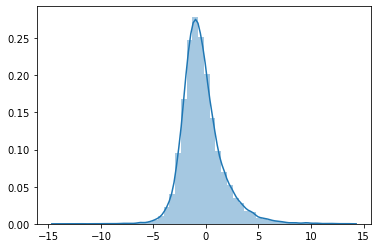

In [238]:
sns.distplot(error_ab_dt)

#### MAE, MSE AND RMSE

In [239]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_ab_dt = mean_absolute_error(y_test1, y_pred_ab_dt)
mse_ab_dt = mean_squared_error(y_test1, y_pred_ab_dt)
rmse_ab_dt = np.sqrt(mse_ab_dt)

print('MAE: ', mae_ab_dt)
print('MSE: ', mse_ab_dt)
print('RMSE: ', rmse_ab_dt)

MAE:  1.5180365205361332
MSE:  4.067954157779659
RMSE:  2.01691699327951


#### r2 score

In [240]:
from sklearn.metrics import r2_score


r2_ab_dt = r2_score(y_test1, y_pred_ab_dt)

print('r^2 score: ', r2_ab_dt)
print('\n')
print(f'{round(r2_ab_dt,4)*100}% of variance in amount is explained by Independent variables collectively')

r^2 score:  0.6677709503151157


66.78% of variance in amount is explained by Independent variables collectively


# Model Comparison

In [241]:
model_comparison = {
    'model' : ['Linear_regression', 'Decision_tree_1', 'Decision_tree_2', 'Random_Forest', 'Ada_Boost'],
    'RMSE' : [rmse_lin, rmse_dtr, rmse_dtr2_gs, rmse_rfr_1, rmse_ab_dt],
    'r2_score': [r2_lin, r2_dtr, r2_dtr2_gs, r2_rfr_1, r2_ab_dt]
}

model_comparison = pd.DataFrame(model_comparison)

In [242]:
model_comparison

,model,RMSE,r2_score
0,Linear_regression,2.078235,0.647263
1,Decision_tree_1,2.791230,0.363714
2,Decision_tree_2,2.055256,0.655021
3,Random_Forest,2.067434,0.650920
4,Ada_Boost,2.016917,0.667771


In [243]:
# The Ada_Boosted model is the best model among this.